<a href="https://colab.research.google.com/github/Guillaume-Cr/Azure-Kinect-Sensor-SDK/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -Uqq fastai

In [2]:
# from fastai.vision.all import *
# path = untar_data(URLs.PETS)
# dls = ImageDataLoaders.from_name_re(path, get_image_files(path/'images'), pat='(.+)_\d+.jpg', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75))
# learn = vision_learner(dls, models.resnet50, metrics=accuracy)
# learn.fine_tune(1)
# learn.path = Path('.')
# learn.export()

In [3]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.8 MB/s eta 0:00:00


In [25]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
key = os.environ.get('AZURE_SEARCH_KEY', 'e202bfdef24b45d297f1c70a5ce819e5')
path = Path('bicycle')
if not path.exists():
  path.mkdir()

In [6]:
results = search_images_bing(key, 'road bicycle')
ims = results.attrgot('contentUrl')
path_road = (path/'road')
download_images(path_road, urls=ims)


In [7]:
results = search_images_bing(key, 'mountain bicycle')
ims = results.attrgot('contentUrl')
path_road = (path/'mountain')
download_images(path_road, urls=ims)

In [8]:
??get_image_files

In [9]:
fns = get_image_files(path)

In [10]:
failed = verify_images(fns)
failed

(#4) [Path('bicycle/mountain/329c7937-ad2a-4557-a5dc-76324c5752f8.jpg'),Path('bicycle/mountain/42dc657f-fbbe-4a49-a3db-9d6dd266d3c5.jpg'),Path('bicycle/mountain/d6761b39-0ec0-4b35-ba5d-fd2a17b409fe.jpg'),Path('bicycle/road/496dd4f2-e887-44c6-ab46-17e57e2e38e4.jpg')]

In [11]:
failed.map(Path.unlink)

(#4) [None,None,None,None]

In [12]:
doc(DataLoader)

DataLoader(dataset=None, bs=None, num_workers=0, pin_memory=False, timeout=0, batch_size=None, shuffle=False, drop_last=False, indexed=None, n=None, device=None, persistent_workers=False, pin_memory_device='', *, wif=None, before_iter=None, after_item=None, before_batch=None, after_batch=None, after_iter=None, create_batches=None, create_item=None, create_batch=None, retain=None, get_idxs=None, sample=None, shuffle_fn=None, do_batch=None)
API compatible with PyTorch DataLoader, with a lot more callbacks and flexibility

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [13]:
pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 11.2 MB/s eta 0:00:00


In [14]:
doc(DataBlock)

In [17]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [18]:
dataloaders = data.dataloaders(path)

In [20]:
learn = vision_learner(dataloaders, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

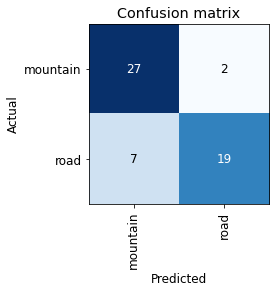

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

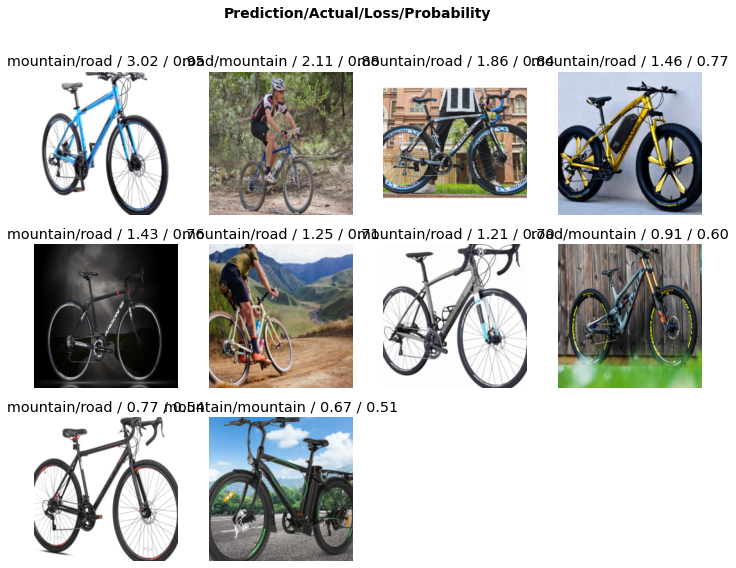

In [23]:
interp.plot_top_losses(10)

In [26]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [27]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()